## Eperiment Run, hadamard and its inversion
* I need sources to track where I take things from and what not to come back to.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from fwht import *

## Natural order transform and inversion

In [2]:
n_pixel = 64
target = cv2.imread("C:\\Users\\David Palecek\\Documents\\UAlg\\my_opt\\Data\\Scripts\\hadamard\\graylena64.bmp")
target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
target = cv2.resize(target, (n_pixel, n_pixel), interpolation = cv2.INTER_AREA)

In [3]:
a = fwht2_wiki(target, inv=False, order='nat')
a_inv = fwht2_wiki(a, inv=True, order='nat')

C:\Users\David Palecek\AppData\Local\Temp\ipykernel_26780\308897003.py:2: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.log(abs(a)))


Text(0.5, 1.0, '236.0')

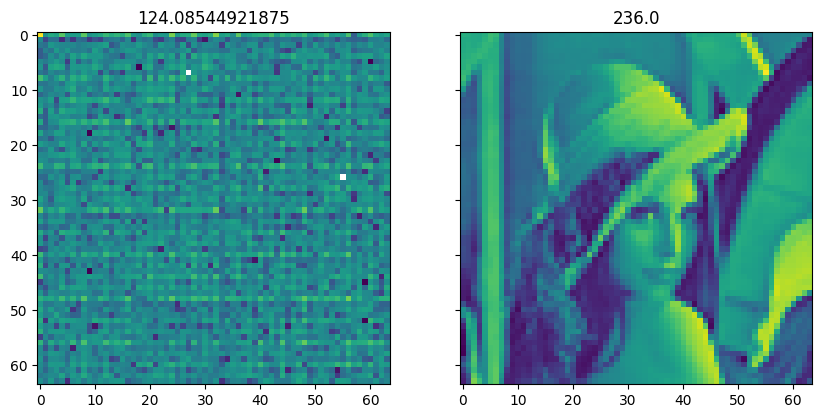

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10, 6))
ax[0].imshow(np.log(abs(a)))
ax[0].set_title(np.amax(a))

ax[1].imshow(a_inv)
ax[1].set_title(np.amax(a_inv))

## Dyadic order of hadamard patterns

In [5]:
b = fwht2_wiki(target, inv=False, order='dya')
b_inv = fwht2_wiki(b, inv=True, order='dya')

C:\Users\David Palecek\AppData\Local\Temp\ipykernel_2224\3034540520.py:2: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.log(abs(b)))


Text(0.5, 1.0, '236.0')

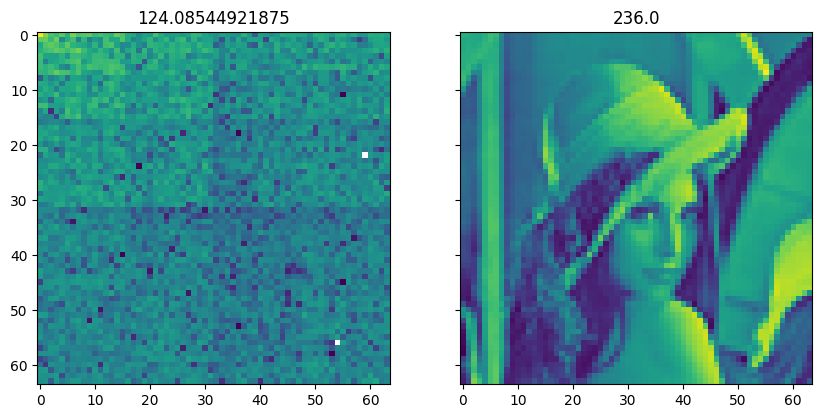

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10, 6))
ax[0].imshow(np.log(abs(b)))
ax[0].set_title(np.amax(b))

ax[1].imshow(b_inv)
ax[1].set_title(np.amax(b_inv))

## Testing sequency zibang

In [7]:
c = fwht2_seq(target, inv=False)
c_inv = fwht2_seq(c, inv=True)

C:\Users\David Palecek\AppData\Local\Temp\ipykernel_2224\2536818053.py:2: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.log(abs(c)))


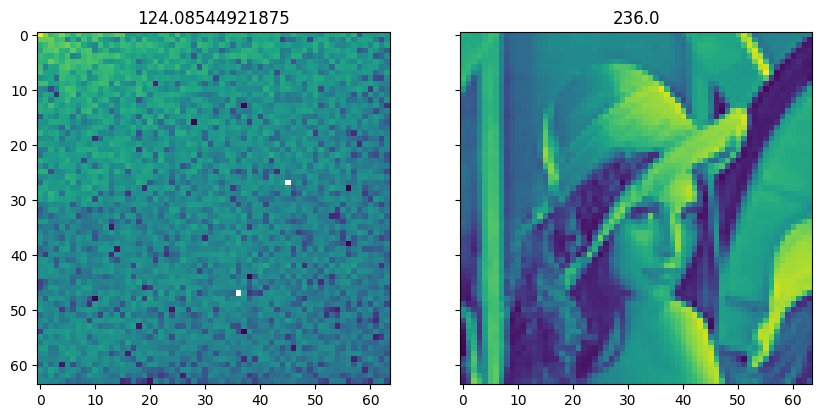

In [8]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10, 6))
ax[0].imshow(np.log(abs(c)))
ax[0].set_title(np.amax(c))

ax[1].imshow(c_inv)
ax[1].set_title(np.amax(c_inv))
plt.show()

## Run experiments (taking coefs in Zigzag manner)
### 1. Natural order

In [21]:
mat = zigzag(n_pixel) -1
N = mat.size
n_steps = 2
order = 'nat'
# run exp only once, take coefficent after
result_nat = run_exp(target, n_pixel, N, n_steps, mat, order=order)

05010015020025030035040045050055060065070075080085090095010001050110011501200125013001350140014501500155016001650170017501800185019001950200020502100215022002250230023502400245025002550260026502700275028002850290029503000305031003150320032503300335034003450350035503600365037003750380038503900395040004050

C:\Users\David Palecek\AppData\Local\Temp\ipykernel_33824\1733300421.py:7: RuntimeWarning: divide by zero encountered in log
  ax[0, i].imshow(np.log(abs(spec)))
C:\Users\David Palecek\AppData\Local\Temp\ipykernel_33824\3893634267.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  return (10 * np.log10(mx_target**2 / MSE))


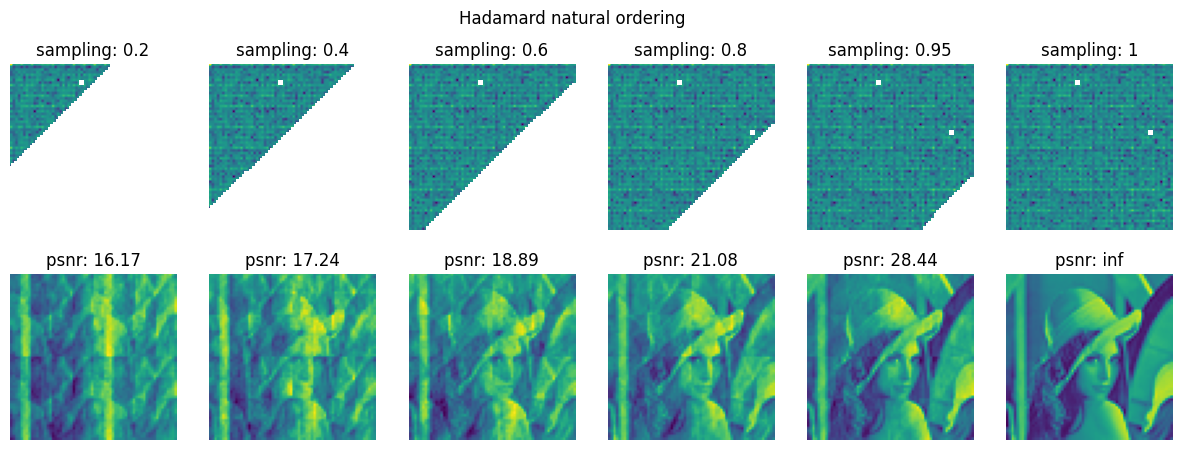

In [32]:
order='nat'
sample_rates = [0.2, 0.4, 0.6, 0.8, 0.95, 1]
fig, ax = plt.subplots(2,len(sample_rates), sharey=True, figsize=(15, 5))
for i in range(len(sample_rates)):
    number = int(target.size * sample_rates[i])
    img, spec = hspi_subset_recon(result_nat, number, n_steps, path_matrix=mat, order=order)
    ax[0, i].imshow(np.log(abs(spec)))
    ax[0, i].set_axis_off()
    ax[0, i].set_title(f'sampling: {sample_rates[i]}')
    
    psn = psnr(target, img)
    ax[1, i].imshow(img)
    ax[1, i].set_title(f'psnr: {np.round(psn, 2)}')
    ax[1, i].set_axis_off()

fig.suptitle('Hadamard natural ordering')
plt.savefig('natural_hadamard_64px.png', dpi=180)
plt.show()

### 2. Dyadic order

In [23]:
mat = zigzag(n_pixel) -1
N = mat.size
n_steps = 2
order = 'dya'
# run exp only once, take coefficent after
result_dya = run_exp(target, n_pixel, N, n_steps, mat, order=order)
# np.savetxt('dya_recon_'+str(mat.size), result_dya)

05010015020025030035040045050055060065070075080085090095010001050110011501200125013001350140014501500155016001650170017501800185019001950200020502100215022002250230023502400245025002550260026502700275028002850290029503000305031003150320032503300335034003450350035503600365037003750380038503900395040004050

C:\Users\David Palecek\AppData\Local\Temp\ipykernel_33824\2966387400.py:7: RuntimeWarning: divide by zero encountered in log
  ax[0, i].imshow(np.log(abs(spec)))
C:\Users\David Palecek\AppData\Local\Temp\ipykernel_33824\3893634267.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  return (10 * np.log10(mx_target**2 / MSE))


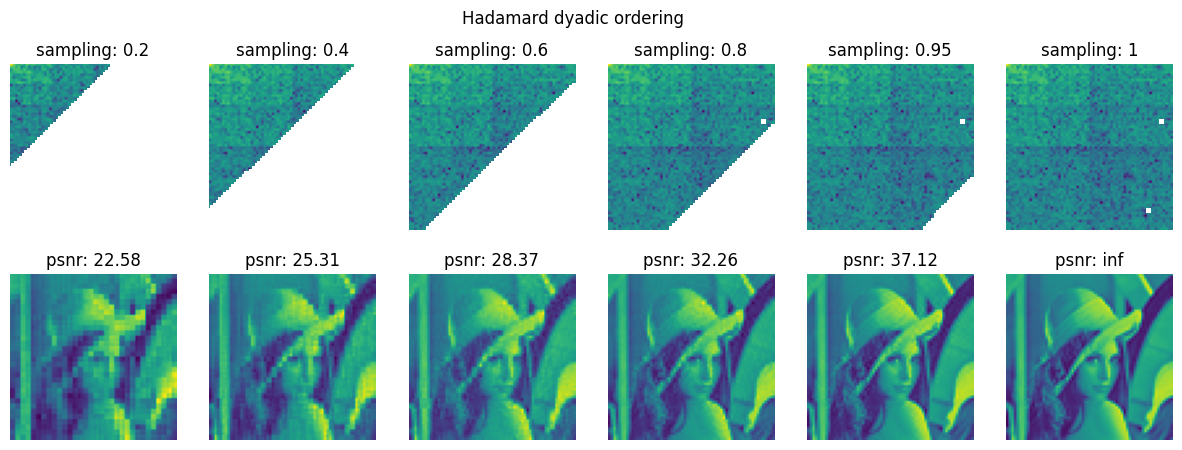

In [33]:
order='dya'
sample_rates = [0.2, 0.4, 0.6, 0.8, 0.95, 1]
fig, ax = plt.subplots(2,len(sample_rates), sharey=True, figsize=(15, 5))
for i in range(len(sample_rates)):
    number = int(target.size * sample_rates[i])
    img, spec = hspi_subset_recon(result_dya, number, n_steps, path_matrix=mat, order=order)
    ax[0, i].imshow(np.log(abs(spec)))
    ax[0, i].set_axis_off()
    ax[0, i].set_title(f'sampling: {sample_rates[i]}')
    
    psn = psnr(target, img)
    ax[1, i].imshow(img)
    ax[1, i].set_title(f'psnr: {np.round(psn, 2)}')
    ax[1, i].set_axis_off()

fig.suptitle('Hadamard dyadic ordering')
plt.savefig('dyadic_hadamard_64px.png', dpi=180)
plt.show()

### 3. Sequency order

In [25]:
mat = zigzag(n_pixel) -1
N = mat.size
n_steps = 2
order = 'seq'
# run exp only once, take coefficent after
result_seq = run_exp(target, n_pixel, N, n_steps, mat, order=order)

05010015020025030035040045050055060065070075080085090095010001050110011501200125013001350140014501500155016001650170017501800185019001950200020502100215022002250230023502400245025002550260026502700275028002850290029503000305031003150320032503300335034003450350035503600365037003750380038503900395040004050

C:\Users\David Palecek\AppData\Local\Temp\ipykernel_33824\1222690645.py:7: RuntimeWarning: divide by zero encountered in log
  ax[0, i].imshow(np.log(abs(spec)))
C:\Users\David Palecek\AppData\Local\Temp\ipykernel_33824\3893634267.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  return (10 * np.log10(mx_target**2 / MSE))


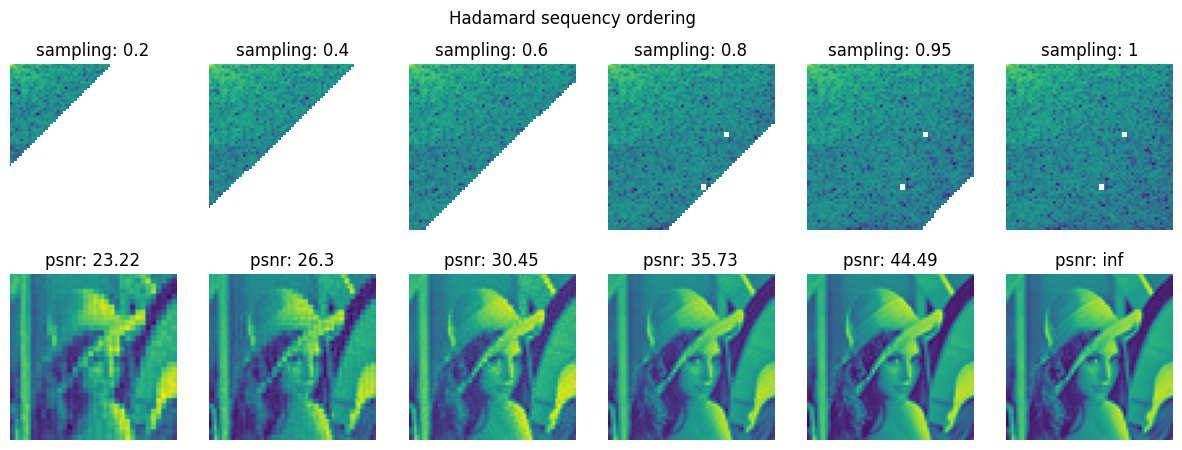

In [34]:
order='seq'
sample_rates = [0.2, 0.4, 0.6, 0.8, 0.95, 1]
fig, ax = plt.subplots(2,len(sample_rates), sharey=True, figsize=(15, 5))
for i in range(len(sample_rates)):
    number = int(target.size * sample_rates[i])
    img, spec = hspi_subset_recon(result_seq, number, n_steps, path_matrix=mat, order=order)
    ax[0, i].imshow(np.log(abs(spec)))
    ax[0, i].set_axis_off()
    ax[0, i].set_title(f'sampling: {sample_rates[i]}')
    
    psn = psnr(target, img)
    ax[1, i].imshow(img)
    ax[1, i].set_title(f'psnr: {np.round(psn, 2)}')
    ax[1, i].set_axis_off()

fig.suptitle('Hadamard sequency ordering')
plt.savefig('sequency_hadamard_64px.png', dpi=180)
plt.show()

In [ ]:
## 